# ANALISIS DEMAM BERDARAH KOTA SEMARANG MENGGUNAKAN ALGORITMA HIERACHICAL CLUSTERING

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.spatial.distance import pdist, squareform
import scipy.stats


MEMANGGIL DATA


In [2]:

url1 = pd.read_excel('rekap desa 21.xlsx')
url2 = pd.read_excel('rekap desa 22.xlsx')
url3 = pd.read_excel('rekap desa 21.xlsx')

df1 = url1
df2 = url2
df3 = url3

# Menampilkan beberapa baris pertama dari setiap dataset untuk verifikasi
from IPython.display import display
display(df1.head())
print('\n') # Menambahkan baris kosong
display(df2.head())
print('\n') # Menambahkan baris kosong
display(df3.head())

,No,Wilayah,Jml Penduduk,P,M,IR/100000,CFR
0,1,Bambankerep,5917,0,0,0.00,0.0
1,2,Bandarharjo,20625,0,0,0.00,0.0
2,3,Bangetayu Kulon,16958,3,0,17.69,0.0
3,4,Bangetayu Wetan,13772,2,0,14.52,0.0
4,5,Bangunharjo,2446,0,0,0.00,0.0


,No,Wilayah,Jml Penduduk,P,M,IR/100000,CFR
0,1,Bambankerep,5917,0,0,0.00,0.0
1,2,Bandarharjo,20625,10,0,48.48,0.0
2,3,Bangetayu Kulon,16958,14,0,82.56,0.0
3,4,Bangetayu Wetan,13772,8,0,58.09,0.0
4,5,Bangunharjo,2446,1,0,40.88,0.0


,No,Wilayah,Jml Penduduk,P,M,IR/100000,CFR
0,1,Bambankerep,5917,0,0,0.00,0.0
1,2,Bandarharjo,20625,0,0,0.00,0.0
2,3,Bangetayu Kulon,16958,3,0,17.69,0.0
3,4,Bangetayu Wetan,13772,2,0,14.52,0.0
4,5,Bangunharjo,2446,0,0,0.00,0.0


MENYATUKAN 3 DATA MENJADI 1 DATAFRAME


In [3]:
# Gabungkan DataFrame berdasarkan 'Wilayah'
merged_df = pd.merge(df1[['Wilayah', 'Jml Penduduk', 'P', 'M']], df2[['Wilayah', 'P', 'M']], on='Wilayah', suffixes=('_2021', '_2022'))
merged_df = pd.merge(merged_df, df3[['Wilayah', 'P', 'M']], on='Wilayah', suffixes=('', '_2023'))

# Ubah nama kolom
merged_df = merged_df.rename(columns={'P': 'P_2023', 'M': 'M_2023'})

# Tampilkan DataFrame yang telah digabungkan
print(merged_df)

             Wilayah  Jml Penduduk  P_2021  M_2021  P_2022  M_2022  P_2023  \
0        Bambankerep          5917       0       0       0       0       0   
1        Bandarharjo         20625       0       0      10       0       0   
2    Bangetayu Kulon         16958       3       0      14       0       3   
3    Bangetayu Wetan         13772       2       0       8       0       2   
4        Bangunharjo          2446       0       0       1       0       0   
..               ...           ...     ...     ...     ...     ...     ...   
173         Wonolopo          9690       0       0       6       0       0   
174      Wonoplumbon          3767       0       0       4       0       0   
175         Wonosari         23332      15       3      12       1      15   
176       Wonotingal          8263       3       0       3       0       3   
177              NaN       1670379     332       9     864      33     332   

     M_2023  
0         0  
1         0  
2         0  
3      

In [4]:
merged_df

,Wilayah,Jml Penduduk,P_2021,M_2021,P_2022,M_2022,P_2023,M_2023
0,Bambankerep,5917,0,0,0,0,0,0
1,Bandarharjo,20625,0,0,10,0,0,0
2,Bangetayu Kulon,16958,3,0,14,0,3,0
3,Bangetayu Wetan,13772,2,0,8,0,2,0
4,Bangunharjo,2446,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...
173,Wonolopo,9690,0,0,6,0,0,0
174,Wonoplumbon,3767,0,0,4,0,0,0
175,Wonosari,23332,15,3,12,1,15,3
176,Wonotingal,8263,3,0,3,0,3,0


HAPUS BARIS

In [5]:
merged_df = merged_df.drop(merged_df.index[-1])

In [6]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Wilayah       177 non-null    object
 1   Jml Penduduk  177 non-null    int64 
 2   P_2021        177 non-null    int64 
 3   M_2021        177 non-null    int64 
 4   P_2022        177 non-null    int64 
 5   M_2022        177 non-null    int64 
 6   P_2023        177 non-null    int64 
 7   M_2023        177 non-null    int64 
dtypes: int64(7), object(1)
memory usage: 11.2+ KB


In [7]:
merged_df.describe()

,Jml Penduduk,P_2021,M_2021,P_2022,M_2022,P_2023,M_2023
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,9437.169492,1.875706,0.050847,4.881356,0.186441,1.875706,0.050847
std,6450.753875,3.250232,0.287449,5.397026,0.469813,3.250232,0.287449
min,584.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4637.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,7578.000000,1.000000,0.000000,3.000000,0.000000,1.000000,0.000000
75%,13249.000000,2.000000,0.000000,6.000000,0.000000,2.000000,0.000000
max,37499.000000,29.000000,3.000000,28.000000,3.000000,29.000000,3.000000


In [8]:
merged_df

,Wilayah,Jml Penduduk,P_2021,M_2021,P_2022,M_2022,P_2023,M_2023
0,Bambankerep,5917,0,0,0,0,0,0
1,Bandarharjo,20625,0,0,10,0,0,0
2,Bangetayu Kulon,16958,3,0,14,0,3,0
3,Bangetayu Wetan,13772,2,0,8,0,2,0
4,Bangunharjo,2446,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...
172,Wonodri,10093,0,0,1,0,0,0
173,Wonolopo,9690,0,0,6,0,0,0
174,Wonoplumbon,3767,0,0,4,0,0,0
175,Wonosari,23332,15,3,12,1,15,3


In [9]:
missing_values = merged_df.isnull().sum()
print(missing_values)

Wilayah         0
Jml Penduduk    0
P_2021          0
M_2021          0
P_2022          0
M_2022          0
P_2023          0
M_2023          0
dtype: int64


<Axes: >

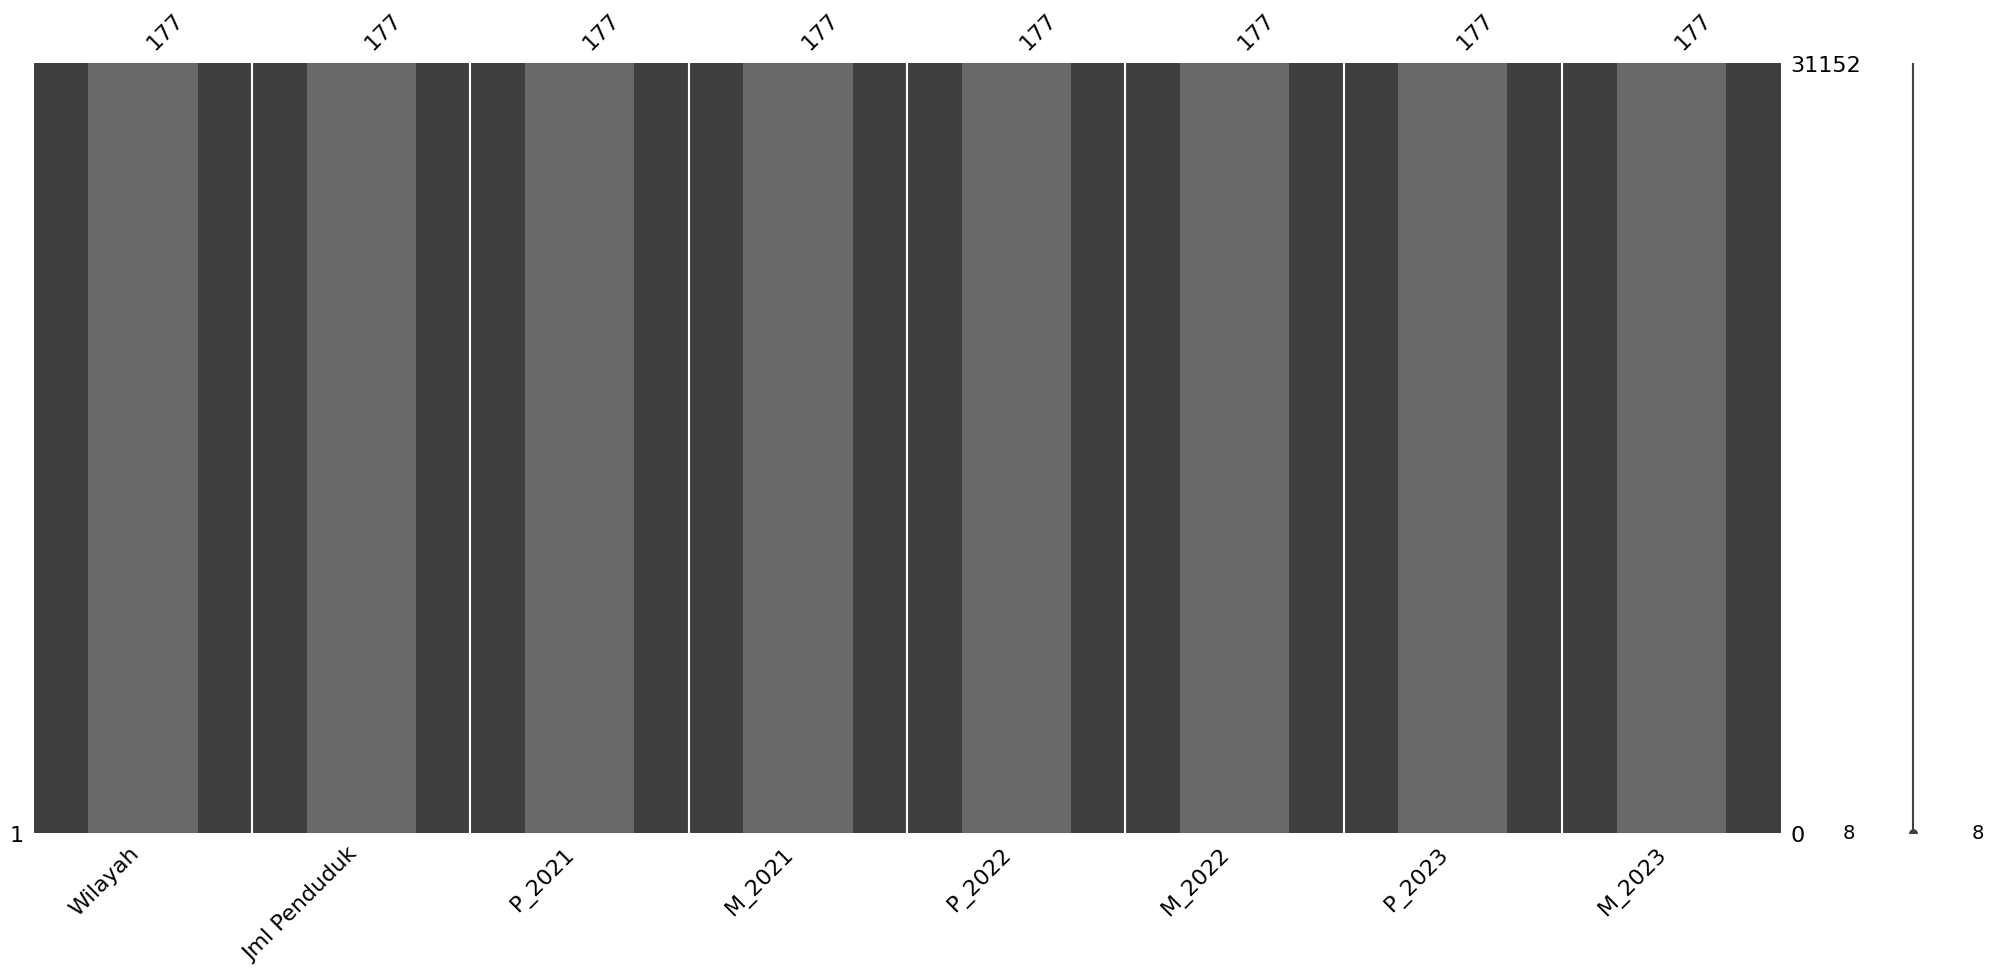

In [10]:
import missingno as msno

# Matrix plot to visualize missing values
msno.matrix(merged_df)

# Bar chart to show the count of missing values per column
msno.bar(merged_df)


In [15]:
ds = merged_df.copy()

In [16]:
# Tahap 1
df_tahap1 = merged_df.copy()
# Lakukan proses di df_tahap1

# Tahap 2
ds = df_tahap1.copy()
# Lakukan proses di df_tahap2

# dst.

NORMALISASI DATA

In [18]:
ds.describe()

,Jml Penduduk,P_2021,M_2021,P_2022,M_2022,P_2023,M_2023
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,9437.169492,1.875706,0.050847,4.881356,0.186441,1.875706,0.050847
std,6450.753875,3.250232,0.287449,5.397026,0.469813,3.250232,0.287449
min,584.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4637.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,7578.000000,1.000000,0.000000,3.000000,0.000000,1.000000,0.000000
75%,13249.000000,2.000000,0.000000,6.000000,0.000000,2.000000,0.000000
max,37499.000000,29.000000,3.000000,28.000000,3.000000,29.000000,3.000000


In [19]:
from sklearn.preprocessing import RobustScaler

# Buat objek Robust Scaler
scaler = RobustScaler()

# Kolom yang akan dinormalisasi
columns_to_normalize = ['Jml Penduduk','P_2021', 'P_2022', 'P_2023', 'M_2021', 'M_2022', 'M_2023']

# Fit dan transform data
ds[columns_to_normalize] = scaler.fit_transform(ds[columns_to_normalize])

# Tampilkan data yang telah dinormalisasi (opsional)
ds

,Wilayah,Jml Penduduk,P_2021,M_2021,P_2022,M_2022,P_2023,M_2023
0,Bambankerep,-0.192870,-0.5,0.0,-0.6,0.0,-0.5,0.0
1,Bandarharjo,1.514979,-0.5,0.0,1.4,0.0,-0.5,0.0
2,Bangetayu Kulon,1.089178,1.0,0.0,2.2,0.0,1.0,0.0
3,Bangetayu Wetan,0.719229,0.5,0.0,1.0,0.0,0.5,0.0
4,Bangunharjo,-0.595913,-0.5,0.0,-0.4,0.0,-0.5,0.0
...,...,...,...,...,...,...,...,...
172,Wonodri,0.292034,-0.5,0.0,-0.4,0.0,-0.5,0.0
173,Wonolopo,0.245239,-0.5,0.0,0.6,0.0,-0.5,0.0
174,Wonoplumbon,-0.442522,-0.5,0.0,0.2,0.0,-0.5,0.0
175,Wonosari,1.829308,7.0,3.0,1.8,1.0,7.0,3.0


In [22]:
ds.describe()

,Jml Penduduk,P_2021,M_2021,P_2022,M_2022,P_2023,M_2023
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,0.215881,0.437853,0.050847,0.376271,0.186441,0.437853,0.050847
std,0.749042,1.625116,0.287449,1.079405,0.469813,1.625116,0.287449
min,-0.812123,-0.500000,0.000000,-0.600000,0.000000,-0.500000,0.000000
25%,-0.341500,-0.500000,0.000000,-0.400000,0.000000,-0.500000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.658500,0.500000,0.000000,0.600000,0.000000,0.500000,0.000000
max,3.474338,14.000000,3.000000,5.000000,3.000000,14.000000,3.000000


MENGUKUR JARAK

In [23]:
import pandas as pd
from scipy.spatial.distance import pdist, squareform

# # Pilih kolom yang akan digunakan untuk perhitungan jarak
# columns_for_distance = ['Jml Penduduk', 'P_2021','P_2022','P_2023','M_2021','M_2022','M_2023']

# Dataframe yang akan diukur jaraknya (misalnya, 'ds')
data = ds[columns_to_normalize]

# Metode jarak yang ingin digunakan (pilih salah satu)
# 'cityblock': Manhattan distance
# 'cosine': Cosine distance
# 'chebyshev': Chebyshev distance
# 'correlation': Correlation distance
# 'hamming': Hamming distance
# ... (dan lain-lain, lihat dokumentasi scipy.spatial.distance)

distance_metric = 'cityblock'  # Ganti dengan metode yang diinginkan

# Hitung jarak
distances = pdist(data, metric=distance_metric)

# Ubah jarak menjadi bentuk matriks
distance_matrix = squareform(distances)

# Buat DataFrame dari matriks jarak
distance_df = pd.DataFrame(distance_matrix, index=ds['Wilayah'], columns=ds['Wilayah'])

# Tampilkan DataFrame jarak
print(distance_df)

# Hitung jarak minimum, maksimum, dan rata-rata
min_distance = distance_matrix.min()
max_distance = distance_matrix.max()
avg_distance = distance_matrix.mean()

# Temukan wilayah dengan jarak minimum
min_distance_indices = np.unravel_index(np.argmin(distance_matrix), distance_matrix.shape)
wilayah_min_distance = [distance_df.index[min_distance_indices[0]], distance_df.index[min_distance_indices[1]]]

# Temukan wilayah dengan jarak maksimum
max_distance_indices = np.unravel_index(np.argmax(distance_matrix), distance_matrix.shape)
wilayah_max_distance = [distance_df.index[max_distance_indices[0]], distance_df.index[max_distance_indices[1]]]

# Temukan jarak terkecil selain 0
distance_matrix_no_zero = distance_matrix[distance_matrix != 0]
min_distance_no_zero = distance_matrix_no_zero.min()

# Temukan wilayah dengan jarak terkecil selain 0
min_distance_indices_no_zero = np.unravel_index(np.argmin(distance_matrix_no_zero), distance_matrix.shape)

# Akses elemen distance_df.index dengan masing-masing indeks
wilayah1 = distance_df.index[min_distance_indices_no_zero[0]]
wilayah2 = distance_df.index[min_distance_indices_no_zero[1]]

# Cetak hasilnya
print(f"• Jarak Terkecil (selain 0): Jarak terkecil selain 0 yang terukur antara dua observasi adalah {min_distance_no_zero:.2f} yaitu wilayah {wilayah1} dan {wilayah2} yang mengindikasikan adanya pasangan observasi dengan karakteristik yang sangat mirip.")
print(f"• Jarak Minimum: Jarak terkecil yang terukur antara dua observasi adalah {min_distance:.2f} yaitu wilayah {wilayah_min_distance[0]} dan {wilayah_min_distance[1]} yang mengindikasikan adanya pasangan observasi dengan karakteristik yang sangat mirip.")
print(f"• Jarak Maksimum: Jarak terbesar yang terukur adalah {max_distance:.2f} yaitu wilayah {wilayah_max_distance[0]} dan {wilayah_max_distance[1]} yang menunjukkan adanya observasi-observasi yang sangat berbeda satu sama lain dalam dataset.")
print(f"• Rata-rata Jarak: Rata-rata jarak antar observasi adalah {avg_distance:.2f}, memberikan gambaran umum tentang sebaran data dalam ruang multidimensi.")

Wilayah          Bambankerep  Bandarharjo  Bangetayu Kulon  Bangetayu Wetan  \
Wilayah                                                                       
Bambankerep         0.000000     3.707850         7.082048         4.512099   
Bandarharjo         3.707850     0.000000         4.225801         3.195750   
Bangetayu Kulon     7.082048     4.225801         0.000000         2.569949   
Bangetayu Wetan     4.512099     3.195750         2.569949         0.000000   
Bangunharjo         0.603042     3.910892         7.285091         4.715142   
...                      ...          ...              ...              ...   
Wonodri             0.684905     3.022945         6.397144         3.827195   
Wonolopo            1.638110     2.069740         5.443939         2.873990   
Wonoplumbon         1.049652     3.157501         6.531700         3.961751   
Wonosari           26.422178    22.714329        20.140130        21.910079   
Wonotingal          3.872411     5.835439         3.

IMPLEMENTASI LINKAGE MATRIX

VISUALISASI DENDOGRAM

In [24]:
# from scipy.cluster.hierarchy import linkage, cophenet, dendrogram
# from scipy.spatial.distance import pdist, squareform
# import matplotlib.pyplot as plt

# methods = ['single', 'complete', 'average', 'ward']

# # Hitung linkage matrix (Z) sekali untuk setiap metode
# linkage_matrices = {}
# for method in methods:
#     linkage_matrices[method] = linkage(distance_matrix, method=method)

# # Kode 1: Menghitung Korelasi Cophenetic (direvisi)
# for method in methods:
#     Z = linkage_matrices[method]  # Gunakan Z yang sudah dihitung

#     # Convert the squareform distance matrix to a condensed distance matrix
#     condensed_distance_matrix = squareform(distance_matrix)  # Change: Use squareform to get condensed matrix

#     c, coph_dists = cophenet(Z, condensed_distance_matrix) # Change: Pass condensed_distance_matrix
#     print(f"Metode: {method}, Korelasi Cophenetic: {c}")

# # Kode 2: Visualisasi Dendrogram (direvisi)
# fig, axes = plt.subplots(2, 2, figsize=(15, 10))
# axes = axes.flatten()

# for i, method in enumerate(methods):
#     Z = linkage_matrices[method]  # Gunakan Z yang sudah dihitung
#     dendrogram(Z, labels=ds['Wilayah'].values, orientation='top', leaf_rotation=90, ax=axes[i])
#     axes[i].set_title(f'Dendrogram - {method.capitalize()} Linkage')
#     axes[i].set_xlabel('Wilayah')
#     axes[i].set_ylabel('Jarak')

# plt.tight_layout()
# plt.show()

/tmp/ipykernel_13582/1814801499.py:13: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrices[method] = linkage(distance_matrix, method=method)


Metode: single, Korelasi Cophenetic: 0.9307739300033764
Metode: complete, Korelasi Cophenetic: 0.8897247632148602
Metode: average, Korelasi Cophenetic: 0.9308500157854337
Metode: ward, Korelasi Cophenetic: 0.8094648473869278


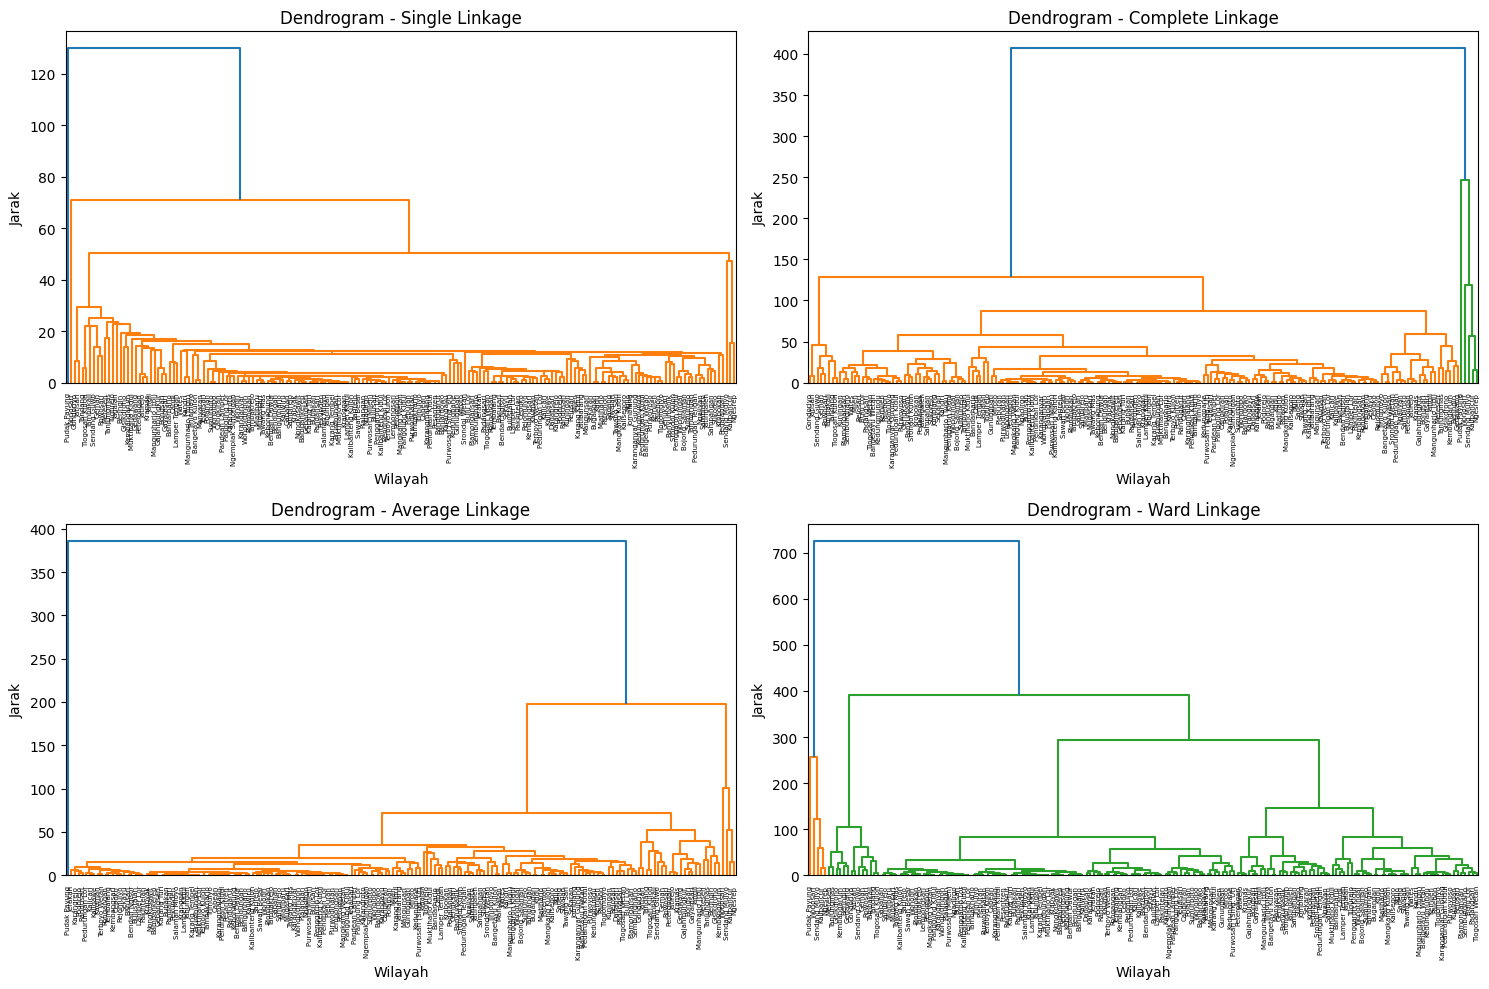

In [25]:
from scipy.cluster.hierarchy import linkage, cophenet, dendrogram
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import numpy as np

methods = ['single', 'complete', 'average', 'ward']

# Hitung linkage matrix (Z) sekali untuk setiap metode
linkage_matrices = {}
for method in methods:
    linkage_matrices[method] = linkage(distance_matrix, method=method)

# Kode 1: Menghitung Korelasi Cophenetic (direvisi)
for method in methods:
    Z = linkage_matrices[method]  # Gunakan Z yang sudah dihitung

    # Convert the squareform distance matrix to a condensed distance matrix
    condensed_distance_matrix = squareform(distance_matrix)  # Change: Use squareform to get condensed matrix

    c, coph_dists = cophenet(Z, condensed_distance_matrix) # Change: Pass condensed_distance_matrix
    print(f"Metode: {method}, Korelasi Cophenetic: {c}")

# Kode 2: Visualisasi Dendrogram (direvisi)
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for i, method in enumerate(methods):
    Z = linkage_matrices[method]  # Gunakan Z yang sudah dihitung
    dendrogram(Z, labels=ds['Wilayah'].values, orientation='top', leaf_rotation=90, ax=axes[i])
    axes[i].set_title(f'Dendrogram - {method.capitalize()} Linkage')
    axes[i].set_xlabel('Wilayah')
    axes[i].set_ylabel('Jarak')

plt.tight_layout()
plt.show()


/tmp/ipykernel_13582/1389338803.py:5: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  dendrogram = sch.dendrogram(sch.linkage(distance_matrix, method='average'),


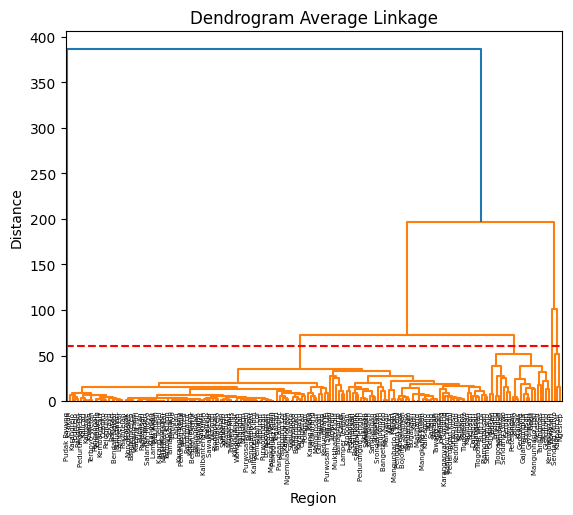

In [26]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

# distance_matrix adalah matriks jarak yang telah Anda hitung sebelumnya
dendrogram = sch.dendrogram(sch.linkage(distance_matrix, method='average'),
                          labels=ds['Wilayah'].values,
                          orientation='top',
                          leaf_rotation=90)

plt.title('Dendrogram Average Linkage')
plt.xlabel('Region')
plt.ylabel('Distance')
plt.axhline(y=60, color='red', linestyle='--')
plt.show()

In [27]:
# Tentukan jumlah cluster yang optimal
optimal_n_clusters = 3

# Hapus argumen 'affinity' karena linkage='ward' secara implisit menggunakan 'euclidean'
clusterer = AgglomerativeClustering(n_clusters=optimal_n_clusters, linkage='average')
cluster_labels = clusterer.fit_predict(distance_matrix)

# Tambahkan 1 ke cluster_labels agar dimulai dari 1
cluster_labels = cluster_labels + 1

# Tambahkan label cluster ke DataFrame
merged_df['Cluster'] = cluster_labels

# Hitung metrik evaluasi
davies_bouldin = davies_bouldin_score(distance_matrix, merged_df['Cluster'])
silhouette = silhouette_score(distance_matrix, merged_df['Cluster'], metric='precomputed')
calinski_harabasz = calinski_harabasz_score(distance_matrix, merged_df['Cluster'])

# Tampilkan hasil
print(f"Davies-Bouldin Index: {davies_bouldin}")
print(f"Silhouette Score: {silhouette}")
print(f"Calinski-Harabasz Index: {calinski_harabasz}")

Davies-Bouldin Index: 0.3116406382844937
Silhouette Score: 0.745352073072999
Calinski-Harabasz Index: 147.2800781774396


/home/codespace/.local/lib/python3.12/site-packages/sklearn/cluster/_agglomerative.py:588: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


In [28]:
# Tentukan warna untuk setiap klaster
cluster_colors = {1: 'red', 2: 'orange', 3: ''}


In [29]:
# Melihat jumlah cluster yang terbentuk
num_clusters = len(merged_df['Cluster'].unique())

print(f"Jumlah cluster yang terbentuk: {num_clusters}")

Jumlah cluster yang terbentuk: 3


In [30]:
import pandas as pd

# Menghitung jumlah data di setiap cluster
cluster_counts = merged_df['Cluster'].value_counts()

# Menghitung proporsi setiap cluster
cluster_proportions = cluster_counts / len(ds)

# Menampilkan proporsi cluster
print("Proporsi Cluster:")
print(cluster_proportions)

# (Opsional) Menampilkan dalam bentuk tabel
proportions_df = pd.DataFrame({'Cluster': cluster_proportions.index, 'Proporsi': cluster_proportions.values})
print("\nProporsi Cluster (Tabel):")
print(proportions_df)

Proporsi Cluster:
Cluster
3    0.971751
1    0.022599
2    0.005650
Name: count, dtype: float64

Proporsi Cluster (Tabel):
   Cluster  Proporsi
0        3  0.971751
1        1  0.022599
2        2  0.005650


In [31]:
# Menghitung jumlah data di setiap cluster
cluster_counts = merged_df['Cluster'].value_counts()

# Menampilkan jumlah data di setiap cluster
print("Jumlah Data di Setiap Cluster:")
print(cluster_counts)



Jumlah Data di Setiap Cluster:
Cluster
3    172
1      4
2      1
Name: count, dtype: int64


In [32]:
# # Asumsikan 'scaler' adalah objek RobustScaler yang telah Anda gunakan untuk normalisasi
# # dan 'columns_to_normalize' adalah daftar kolom yang telah dinormalisasi

# # Mengembalikan nilai hasil normalisasi ke nilai asli
# ds[columns_to_normalize] = scaler.inverse_transform(ds[columns_to_normalize])

# # Menampilkan data yang telah dikembalikan ke nilai asli (opsional)
# print(ds)

In [33]:
merged_df

,Wilayah,Jml Penduduk,P_2021,M_2021,P_2022,M_2022,P_2023,M_2023,Cluster
0,Bambankerep,5917,0,0,0,0,0,0,3
1,Bandarharjo,20625,0,0,10,0,0,0,3
2,Bangetayu Kulon,16958,3,0,14,0,3,0,3
3,Bangetayu Wetan,13772,2,0,8,0,2,0,3
4,Bangunharjo,2446,0,0,1,0,0,0,3
...,...,...,...,...,...,...,...,...,...
172,Wonodri,10093,0,0,1,0,0,0,3
173,Wonolopo,9690,0,0,6,0,0,0,3
174,Wonoplumbon,3767,0,0,4,0,0,0,3
175,Wonosari,23332,15,3,12,1,15,3,1


/tmp/ipykernel_13582/765546157.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x_values, y=cluster_counts.values, palette=cluster_colors)


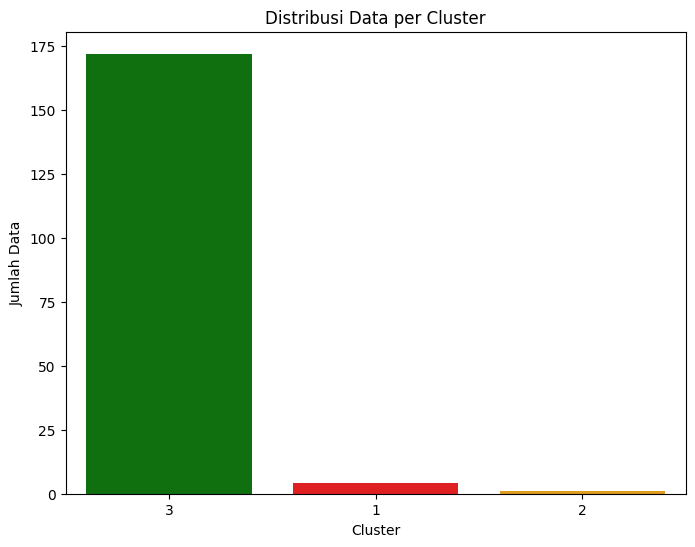

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tentukan warna untuk setiap klaster
cluster_colors = {1: 'red', 2: 'orange', 3: 'green'} # Sesuaikan dengan warna yang Anda inginkan

# Menghitung jumlah data di setiap cluster
cluster_counts = merged_df['Cluster'].value_counts()

# Convert cluster_counts.index to string type
x_values = cluster_counts.index.astype(str)

# Ubah keys di cluster_colors menjadi string
cluster_colors = {str(k): v for k, v in cluster_colors.items()}

# Buat bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=x_values, y=cluster_counts.values, palette=cluster_colors)

# Set labels and title
plt.xlabel("Cluster")
plt.ylabel("Jumlah Data")
plt.title("Distribusi Data per Cluster")

plt.show()

/tmp/ipykernel_13582/1218876060.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=x_values, y=cluster_counts.values, palette=cluster_colors)


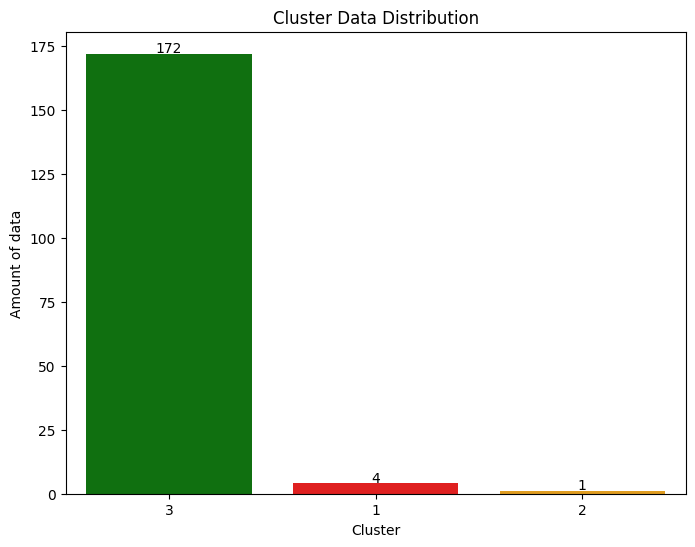

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Tentukan warna untuk setiap klaster
cluster_colors = {1: 'red', 2: 'orange', 3: 'green'}  # Sesuaikan dengan warna yang Anda inginkan

# Menghitung jumlah data di setiap cluster
cluster_counts = merged_df['Cluster'].value_counts()

# Convert cluster_counts.index to string type
x_values = cluster_counts.index.astype(str)

# Ubah keys di cluster_colors menjadi string
cluster_colors = {str(k): v for k, v in cluster_colors.items()}

# Buat bar chart
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=x_values, y=cluster_counts.values, palette=cluster_colors)

# Set labels and title
plt.xlabel("Cluster")
plt.ylabel("Amount of data")  # Ubah label y-axis menjadi "Jumlah Data"
plt.title("Cluster Data Distribution")

# Tambahkan label jumlah data di atas setiap bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.5,
            '{:.0f}'.format(height), ha="center")  # Ubah format menjadi '{:.0f}' untuk menampilkan angka bulat

plt.show()

MENENTUKAN JUMLAH CLUSTER DENGAN SILHOUETTE SCORE


ANALISIS CLUSTER DAN VISUALISASI CLUSTER


In [38]:
cluster_1_data =merged_df[merged_df['Cluster'] == 1]
cluster_2_data = merged_df[merged_df['Cluster'] == 2]
cluster_3_data = merged_df[merged_df['Cluster'] == 3]

In [39]:
cluster_1_stats = cluster_1_data.describe()
cluster_2_stats = cluster_2_data.describe()
cluster_3_stats = cluster_3_data.describe()

In [40]:
cluster_1_data

,Wilayah,Jml Penduduk,P_2021,M_2021,P_2022,M_2022,P_2023,M_2023,Cluster
48,Kalipancur,19969,11,0,22,1,11,0,1
95,Ngesrep,14457,10,1,17,1,10,1,1
146,Sendang Mulyo,37499,12,0,28,0,12,0,1
175,Wonosari,23332,15,3,12,1,15,3,1


In [41]:
cluster_1_data.describe()

,Jml Penduduk,P_2021,M_2021,P_2022,M_2022,P_2023,M_2023,Cluster
count,4.000000,4.000000,4.000000,4.000000,4.00,4.000000,4.000000,4.0
mean,23814.250000,12.000000,1.000000,19.750000,0.75,12.000000,1.000000,1.0
std,9829.361165,2.160247,1.414214,6.849574,0.50,2.160247,1.414214,0.0
min,14457.000000,10.000000,0.000000,12.000000,0.00,10.000000,0.000000,1.0
25%,18591.000000,10.750000,0.000000,15.750000,0.75,10.750000,0.000000,1.0
50%,21650.500000,11.500000,0.500000,19.500000,1.00,11.500000,0.500000,1.0
75%,26873.750000,12.750000,1.500000,23.500000,1.00,12.750000,1.500000,1.0
max,37499.000000,15.000000,3.000000,28.000000,1.00,15.000000,3.000000,1.0


In [43]:
cluster_1_data.describe()

,Jml Penduduk,P_2021,M_2021,P_2022,M_2022,P_2023,M_2023,Cluster
count,4.000000,4.000000,4.000000,4.000000,4.00,4.000000,4.000000,4.0
mean,23814.250000,12.000000,1.000000,19.750000,0.75,12.000000,1.000000,1.0
std,9829.361165,2.160247,1.414214,6.849574,0.50,2.160247,1.414214,0.0
min,14457.000000,10.000000,0.000000,12.000000,0.00,10.000000,0.000000,1.0
25%,18591.000000,10.750000,0.000000,15.750000,0.75,10.750000,0.000000,1.0
50%,21650.500000,11.500000,0.500000,19.500000,1.00,11.500000,0.500000,1.0
75%,26873.750000,12.750000,1.500000,23.500000,1.00,12.750000,1.500000,1.0
max,37499.000000,15.000000,3.000000,28.000000,1.00,15.000000,3.000000,1.0


In [44]:
cluster_2_data.describe()

,Jml Penduduk,P_2021,M_2021,P_2022,M_2022,P_2023,M_2023,Cluster
count,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
mean,22784.0,29.0,1.0,14.0,0.0,29.0,1.0,2.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,22784.0,29.0,1.0,14.0,0.0,29.0,1.0,2.0
25%,22784.0,29.0,1.0,14.0,0.0,29.0,1.0,2.0
50%,22784.0,29.0,1.0,14.0,0.0,29.0,1.0,2.0
75%,22784.0,29.0,1.0,14.0,0.0,29.0,1.0,2.0
max,22784.0,29.0,1.0,14.0,0.0,29.0,1.0,2.0


In [45]:
cluster_3_data.describe()

,Jml Penduduk,P_2021,M_2021,P_2022,M_2022,P_2023,M_2023,Cluster
count,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.0
mean,9025.220930,1.482558,0.023256,4.482558,0.174419,1.482558,0.023256,3.0
std,5923.377384,1.983776,0.151155,4.831033,0.463696,1.983776,0.151155,0.0
min,584.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0
25%,4582.750000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.0
50%,7518.500000,1.000000,0.000000,3.000000,0.000000,1.000000,0.000000,3.0
75%,12329.000000,2.000000,0.000000,6.000000,0.000000,2.000000,0.000000,3.0
max,33516.000000,11.000000,1.000000,27.000000,3.000000,11.000000,1.000000,3.0


<>:10: SyntaxWarning: invalid escape sequence '\d'
<>:10: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_13582/299652618.py:10: SyntaxWarning: invalid escape sequence '\d'
  melted_data_p['Tahun'] = melted_data_p['Tahun'].str.extract('(\d+)').astype(int)  # Ekstrak tahun


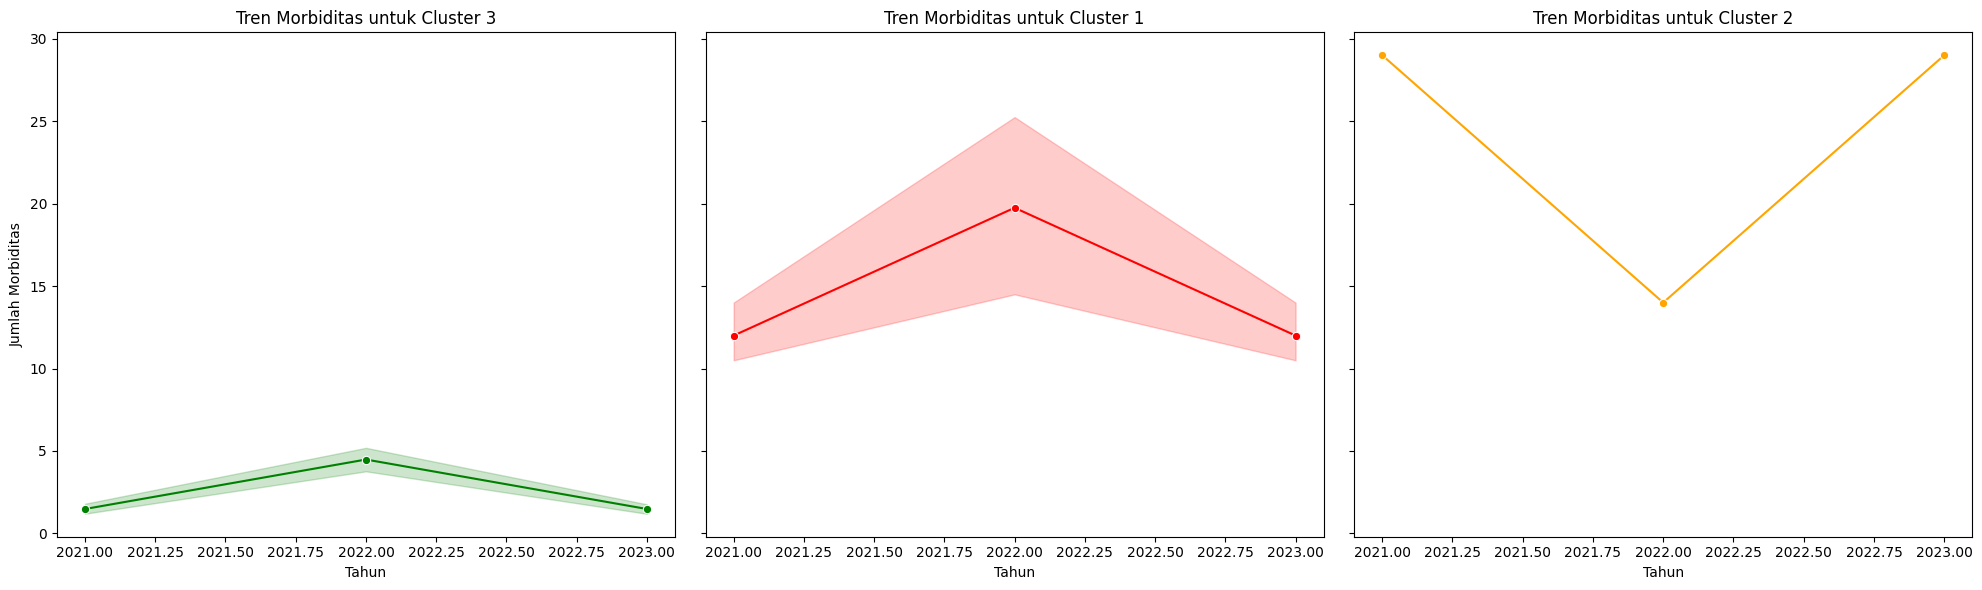

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Kolom pengidap yang ingin divisualisasikan
columns_to_visualize_p = ['P_2021', 'P_2022', 'P_2023']

# Ubah format data untuk pengidap (P)
melted_data_p = pd.melt(merged_df, id_vars=['Cluster'], value_vars=columns_to_visualize_p, var_name='Tahun', value_name='Jumlah')
melted_data_p['Tahun'] = melted_data_p['Tahun'].str.extract('(\d+)').astype(int)  # Ekstrak tahun

# Tentukan warna untuk setiap klaster
cluster_colors = {1: 'red', 2: 'orange', 3: 'green'}

# Buat figure dan axes untuk 3 subplot
fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=True)  # sharey=True agar sumbu y sama

# Loop melalui setiap cluster dan buat plot di subplot yang sesuai
for i, cluster in enumerate(merged_df['Cluster'].unique()):
    cluster_data = melted_data_p[melted_data_p['Cluster'] == cluster]

    sns.lineplot(x='Tahun', y='Jumlah', data=cluster_data, marker='o', color=cluster_colors[cluster], ax=axes[i])

    axes[i].set_title(f'Tren Morbiditas untuk Cluster {cluster}')
    axes[i].set_xlabel('Tahun')
    axes[i].set_ylabel('Jumlah Morbiditas')

plt.tight_layout()  # Atur layout agar tidak tumpang tindih
plt.show()

<>:10: SyntaxWarning: invalid escape sequence '\d'
<>:10: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_13582/3369804922.py:10: SyntaxWarning: invalid escape sequence '\d'
  melted_data_p['Tahun'] = melted_data_p['Tahun'].str.extract('(\d+)').astype(int)  # Ekstrak tahun


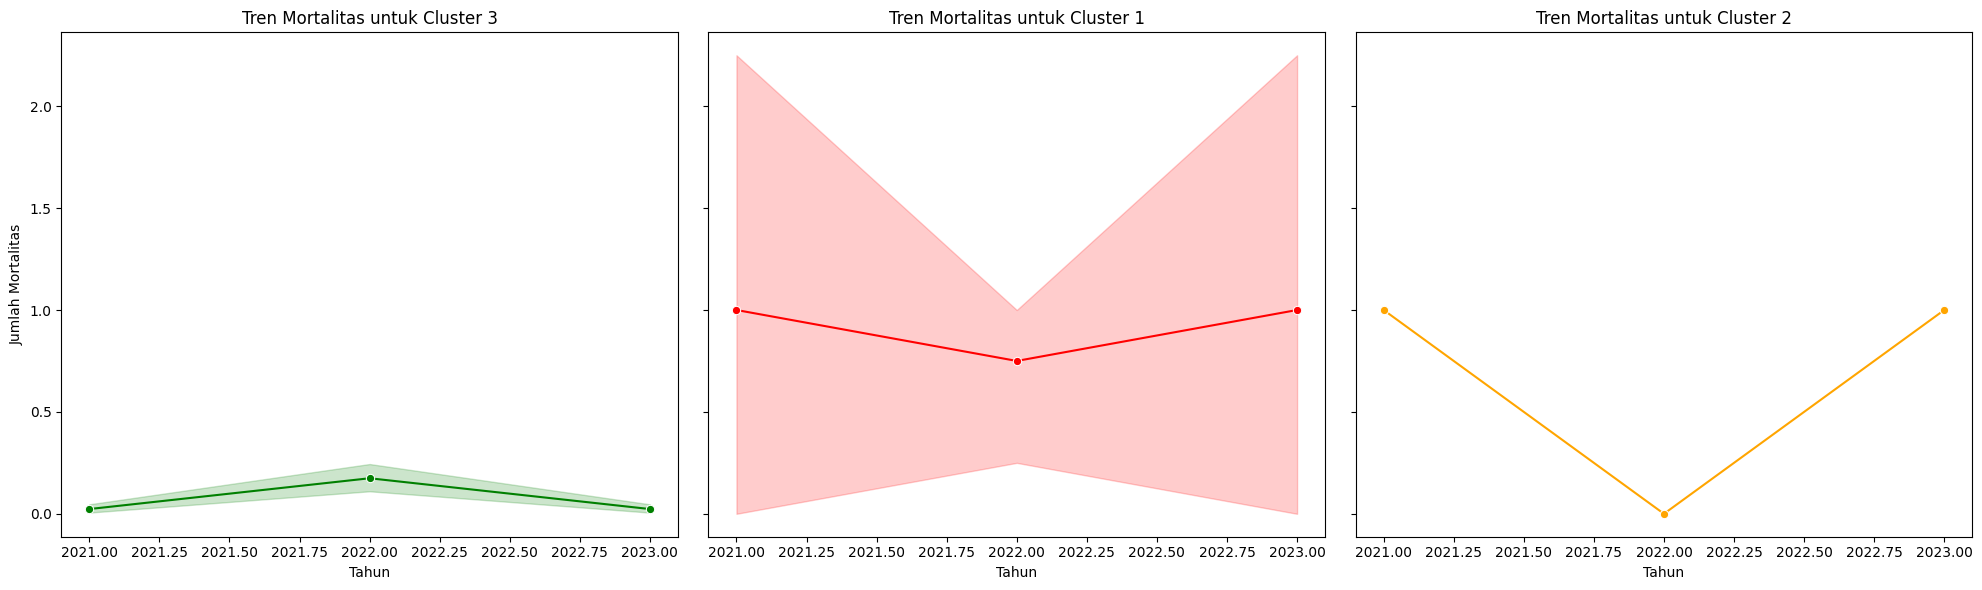

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Kolom pengidap yang ingin divisualisasikan
columns_to_visualize_p = ['M_2021', 'M_2022', 'M_2023']

# Ubah format data untuk pengidap (P)
melted_data_p = pd.melt(merged_df, id_vars=['Cluster'], value_vars=columns_to_visualize_p, var_name='Tahun', value_name='Jumlah')
melted_data_p['Tahun'] = melted_data_p['Tahun'].str.extract('(\d+)').astype(int)  # Ekstrak tahun

# Tentukan warna untuk setiap klaster
cluster_colors = {1: 'red', 2: 'orange', 3: 'green'}

# Buat figure dan axes untuk 3 subplot
fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=True)  # sharey=True agar sumbu y sama

# Loop melalui setiap cluster dan buat plot di subplot yang sesuai
for i, cluster in enumerate(merged_df['Cluster'].unique()):
    cluster_data = melted_data_p[melted_data_p['Cluster'] == cluster]

    sns.lineplot(x='Tahun', y='Jumlah', data=cluster_data, marker='o', color=cluster_colors[cluster], ax=axes[i])

    axes[i].set_title(f'Tren Mortalitas untuk Cluster {cluster}')
    axes[i].set_xlabel('Tahun')
    axes[i].set_ylabel('Jumlah Mortalitas')

plt.tight_layout()  # Atur layout agar tidak tumpang tindih
plt.show()